# CS194-26: Project 1 -Arav Shah¶

In [1]:
import numpy as np
import skimage as sk
import skimage.io as skio
import matplotlib.pyplot as plt
import math
from skimage.transform import rescale
from skimage import feature
from scipy import signal
from scipy.ndimage import rotate
import cv2
import skimage.transform as sktr
from scipy.ndimage import gaussian_filter
from skimage.color import rgb2gray

## Part 1.1: Finite Difference Operator

In [2]:
# Take in an image name, read the image, convert the image to double, and output the resulting b, g, r images

def read_image_grey(name):
    im = skio.imread(name, as_gray = True)  
#     im = sk.img_as_float(im)
    return im

def read_image(name):
    im = skio.imread(name)  
    im = sk.img_as_float(im)
    return im

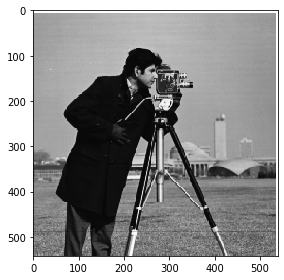

In [3]:
cameraman = read_image_grey("cameraman.png")

skio.imshow(cameraman)

In [4]:
D_x = np.array([[-1, 1]])
D_y = D_x.T

partial_x = signal.convolve2d(cameraman, D_x, mode = 'same')
partial_y = signal.convolve2d(cameraman, D_y, mode = 'same')


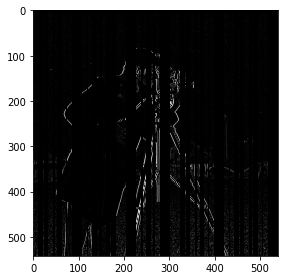

In [5]:
skio.imshow(np.absolute(partial_x))

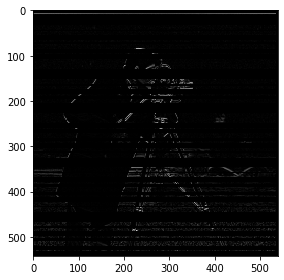

In [6]:
skio.imshow(np.absolute(partial_y))

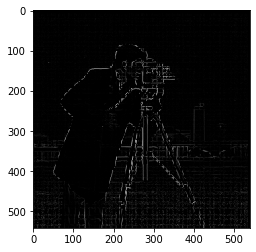

In [7]:
# Compute gradient magnitude image

grad_mag = np.sqrt(partial_x**2 + partial_y**2)

plt.figure()
plt.imshow(grad_mag, cmap='gray')

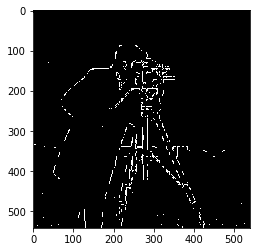

In [10]:
# Binarize image

binarized = np.clip(grad_mag > .25, 0, 1)

plt.figure()
plt.imshow(binarized, cmap='gray')

In [11]:
# Save images

fname = 'output_images/cameraman_partial_x.jpg'
skio.imsave(fname, partial_x)

fname = 'output_images/cameraman_partial_y.jpg'
skio.imsave(fname, partial_y)

fname = 'output_images/cameraman_gradient_magnitude.jpg'
skio.imsave(fname, grad_mag)

fname = 'output_images/cameraman_edge_image.jpg'
skio.imsave(fname, binarized)

Lossy conversion from float64 to uint8. Range [-1.0, 0.8235294117647058]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-1.0, 0.6823529411764706]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 1.4142135623730951]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Arav Shah\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: output_images/cameraman_edge_image.jpg is a low contrast image
  del sys.path[0]
Lossy conversion from int32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


## Part 1.2: Derivative of Gaussian (DoG) Filter

In [23]:
guas_1d = cv2.getGaussianKernel(15, 2)
guas_2d = np.outer(guas_1d, guas_1d.T)


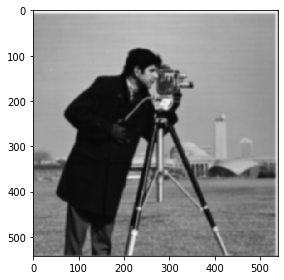

In [24]:
# Blur image, then compute gradient magnitude

cameraman_blurred = signal.convolve2d(cameraman, guas_2d, mode = 'same')
skio.imshow(cameraman_blurred)

In [25]:
partial_x_b = signal.convolve2d(cameraman_blurred, D_x, mode = 'same')
partial_y_b = signal.convolve2d(cameraman_blurred, D_y, mode = 'same')


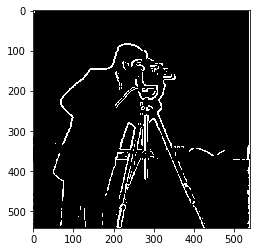

In [26]:
grad_mag_b = np.sqrt(partial_x_b**2 + partial_y_b**2)

binarized_b = np.clip(grad_mag_b > .07, 0, 1)

plt.figure()
plt.imshow(binarized_b, cmap='gray')

In [27]:
# Derivative of Guassian Filters

guas_partial_x = signal.convolve2d(guas_2d, D_x, mode = 'same')
guas_partial_y = signal.convolve2d(guas_2d, D_y, mode = 'same')

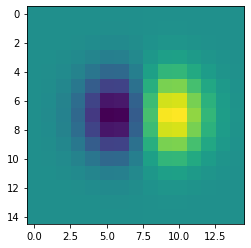

In [28]:
plt.figure()
plt.imshow(guas_partial_x)

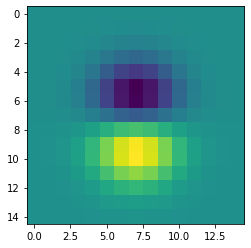

In [29]:
plt.figure()
plt.imshow(guas_partial_y)

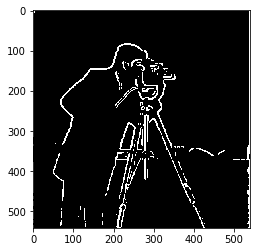

In [30]:
partial_x_g = signal.convolve2d(cameraman, guas_partial_x, mode = 'same')
partial_y_g = signal.convolve2d(cameraman, guas_partial_y, mode = 'same')

grad_mag_g = np.sqrt(partial_x_g**2 + partial_y_g**2)
binarized_g = np.clip(grad_mag_g > .07, 0, 1)

plt.figure()
plt.imshow(binarized_g, cmap='gray')

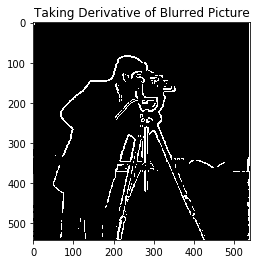

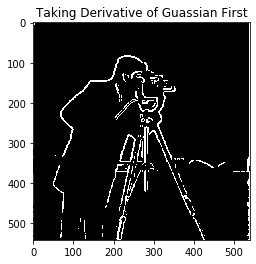

In [31]:
plt.figure()
plt.title("Taking Derivative of Blurred Picture")
plt.imshow(binarized_b, cmap='gray')

plt.figure()
plt.title("Taking Derivative of Guassian First")
plt.imshow(binarized_g, cmap='gray')

In [32]:
# Verify images are the same

temp = binarized_g == binarized_b
verify = np.size(temp) - np.count_nonzero(temp)
verify

print("The two images match on:", 1 - verify/temp.size, "% of pixels.")


The two images match on: 0.9997027470274703 % of pixels.


In [33]:
# Save images

fname = 'output_images/cameraman_edge_guas_then_derivative.jpg'
skio.imsave(fname, binarized_b)

fname = 'output_images/cameraman_edge_derivative_of_guas.jpg'
skio.imsave(fname, binarized_g)

fname = 'output_images/cameraman_DoG_x.jpg'
skio.imsave(fname, guas_partial_x)

fname = 'output_images/cameraman_DoG_y.jpg'
skio.imsave(fname, guas_partial_y)

C:\Users\Arav Shah\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: output_images/cameraman_edge_guas_then_derivative.jpg is a low contrast image
  after removing the cwd from sys.path.
Lossy conversion from int32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Arav Shah\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: output_images/cameraman_edge_derivative_of_guas.jpg is a low contrast image
  import sys
Lossy conversion from int32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Arav Shah\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: output_images/cameraman_DoG_x.jpg is a low contrast image
  # Remove the CWD from sys.path while we load stuff.
Lossy conversion from float64 to uint8. Range [-0.011218974094543265, 0.011218974094543265]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Arav Shah\anaconda3\lib\

### Explanation

From the previous calculation, it is easy to see that image 1 (image with guassian applied before taking the derivative) and image (image with derivative taken on guassian first) are essentially equivalent. I believe the minor differences are due to rounding errors from taking convolutions and square roots. To the human eye, both pictures look exactly the same. 

Compared to the edge image from part 1.1, the edge images from part 1.2 are significantly clearer and smoother. This is because applying the guassian gets rid of all the high frequency edges and only keeps the more pronounced low and mid frequency edges. This remmoves a lot of noise, giving us a much nicer image.

## Part 1.3: Image Straightening

In [34]:
def percent_vert_and_horizontal_edges(hist):
    valid = 0
    invalid = 0
    
    for x in hist:
        valid = valid + x[0] + x[2] + x[4]
        invalid = invalid + x[1] + x[3]
         
    return valid/(valid + invalid)

In [35]:
def calc_hist(im, q, guas_partial_x, guas_partial_y, sequence):
    partial_x = signal.convolve2d(im[q:-q, q:-q], guas_partial_x, mode = 'same')
    partial_y = signal.convolve2d(im[q:-q, q:-q], guas_partial_y, mode = 'same')

    grad_angle = np.arctan(partial_y/partial_x) * 180 / np.pi
    lst, bins, patches = plt.hist(grad_angle, sequence)
    
    return lst

In [36]:
guas_1d = cv2.getGaussianKernel(15, 2)
guas_2d = np.outer(guas_1d, guas_1d.T)

guas_partial_x = signal.convolve2d(guas_2d, D_x, mode = 'same')
guas_partial_y = signal.convolve2d(guas_2d, D_y, mode = 'same')

sequence = [-90, -88, -1, 1, 88, 90]

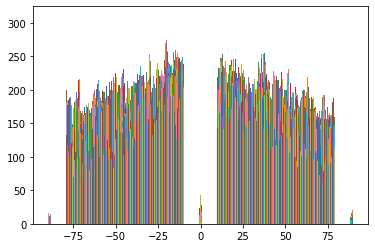

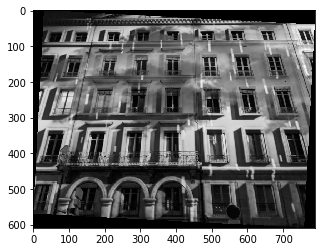

-3 0.0884904798776977



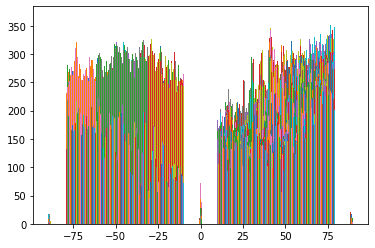

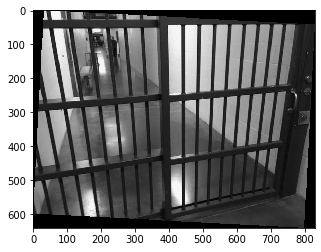

-3 0.08902229845626072



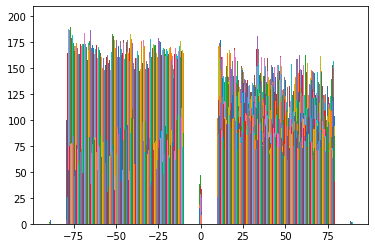

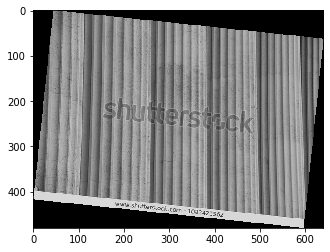

-6 0.11226783968719453



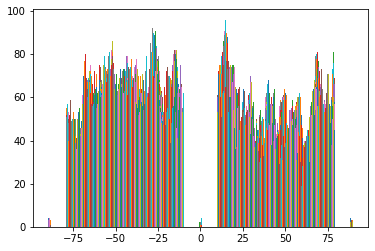

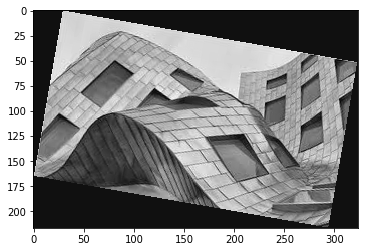

-10 0.037507631257631256



In [37]:
pictures = ["facade.jpg", "jaildoor.jpg", "angled_lines.jpg", "warped_building.jpg"]
rotation_angles = range(-10, 11)
best_angle = 0
best_percentage = 0
best_angles = []
best_percentages = []
rotated_images = []
q = 150

for pic in pictures:
    best_angle = 0
    im = read_image_grey(pic)
    
    if pic == "facade.jpg":
        im = rescale(im, .2)
        
    if pic == "warped_building.jpg":
        q = 50        
    
    partial_x = signal.convolve2d(im, guas_partial_x, mode = 'same')
    partial_y = signal.convolve2d(im, guas_partial_y, mode = 'same')
    grad_mag = np.sqrt(partial_x**2 + partial_y**2)
    
    for i in rotation_angles:
        temp = rotate(grad_mag, i)
        
        hist = calc_hist(temp, q, guas_partial_x, guas_partial_y, sequence)
        percent_valid = percent_vert_and_horizontal_edges(hist)
        
        if percent_valid > best_percentage:
            best_percentage = percent_valid
            best_angle = i 
      
    
    temp = rotate(im, best_angle)
    hist = calc_hist(temp, q, guas_partial_x, guas_partial_y, sequence)
    
    plt.figure()
    plt.imshow(temp, cmap = 'gray')
    plt.show()
    print(best_angle, best_percentage)
    print()
    
    rotated_images.append(temp)
    best_angles.append(best_angle)
    best_angle = 0
    best_percentages.append(best_percentage)
    best_percentage = 0
    q = 150


In [38]:
for i in range(len(pictures)):
    print(pictures[i], best_angles[i], best_percentages[i])

facade.jpg -3 0.0884904798776977
jaildoor.jpg -3 0.08902229845626072
angled_lines.jpg -6 0.11226783968719453
warped_building.jpg -10 0.037507631257631256


In [39]:
# Save Images

for i in range(0, len(pictures)):
    fname = 'output_images/rotated_' + pictures[i][:-3] + 'jpg'
    skio.imsave(fname, rotated_images[i])

Lossy conversion from float64 to uint8. Range [-0.002724844159507595, 0.9904137101542592]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.002018937140878407, 1.0324782344287877]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 1.1885219207889008]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.06835440722089796, 1.0119491834523489]. Convert image to uint8 prior to saving to suppress this warning.


## Part 2.1: Image "Sharpening"

In [43]:
def unsharp_mask_filter(im, guas, alpha):
    
    temp = 1 + alpha
    identity = signal.unit_impulse((guas.shape[0], guas.shape[1]), 'mid')
    part1 = temp * identity
    part2 = (-1 * (alpha * guas))
    part3 = np.add(part1, part2)
    
    final_ims = []
    
    for i in range(3):       

        final = signal.convolve2d(im[:,:,i], part3, mode = 'same')
        final_ims.append(final)
        
    combined = np.dstack(final_ims)
    return np.clip(combined, 0, 1)   

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


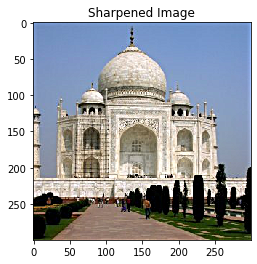

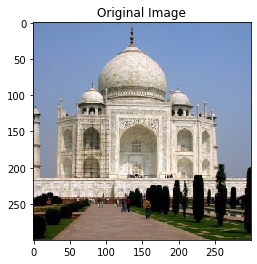

In [44]:
im = read_image("taj.jpg")

guas_1d = cv2.getGaussianKernel(13, 3)
guas_2d = np.outer(guas_1d, guas_1d.T)

x = unsharp_mask_filter(im, guas_2d, .6)

# Save Image
fname = 'output_images/sharpened_taj.jpg'
skio.imsave(fname, x)

plt.figure()
plt.imshow(x)
plt.title("Sharpened Image")
plt.show()

plt.figure()
plt.imshow(im)
plt.title("Original Image")
plt.show()

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


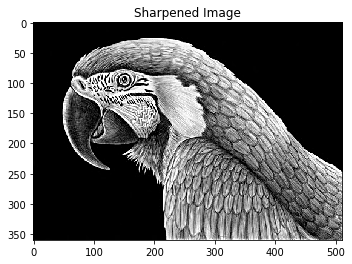

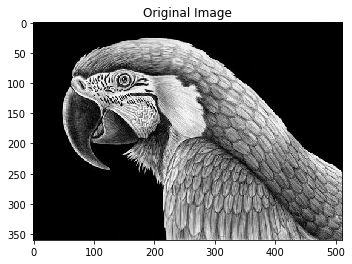

In [45]:
im = read_image("parrot.jpg")

guas_1d = cv2.getGaussianKernel(13, 3)
guas_2d = np.outer(guas_1d, guas_1d.T)

x = unsharp_mask_filter(im, guas_2d, .5)

# Save Image
fname = 'output_images/sharpened_parrot.jpg'
skio.imsave(fname, x)

plt.figure()
plt.imshow(x)
plt.title("Sharpened Image")
plt.show()

plt.figure()
plt.imshow(im)
plt.title("Original Image")
plt.show()

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


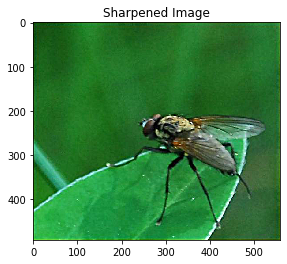

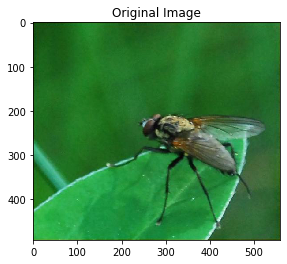

In [46]:
im = read_image("fly.jpg")

guas_1d = cv2.getGaussianKernel(21, 3)
guas_2d = np.outer(guas_1d, guas_1d.T)

x = unsharp_mask_filter(im, guas_2d, 1)

# Save Image
fname = 'output_images/sharpened_fly.jpg'
skio.imsave(fname, x)

plt.figure()
plt.imshow(x)
plt.title("Sharpened Image")
plt.show()

plt.figure()
plt.imshow(im)
plt.title("Original Image")
plt.show()

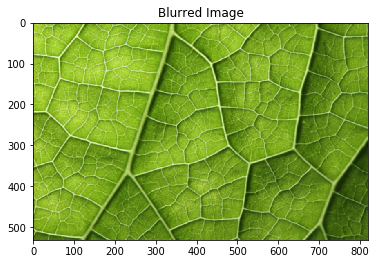

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


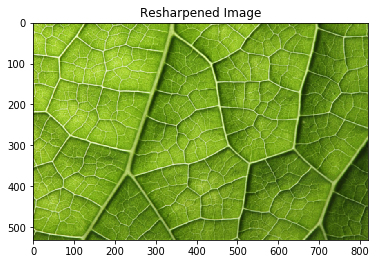

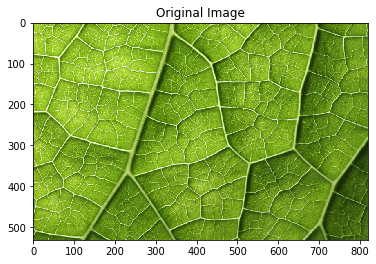

In [47]:
# Blur image then resharpen

guas_1d = cv2.getGaussianKernel(3, 2)
guas_2d = np.outer(guas_1d, guas_1d.T)

im = read_image("leaf.jpg")

blurred_ims = []
for i in range(3):
    q = signal.convolve2d(im[:,:,i], guas_2d, mode = 'same')
    blurred_ims.append(q)

blurred_im = np.dstack(blurred_ims)
blurred_im = np.clip(blurred_im, 0, 1)

plt.figure()
plt.imshow(blurred_im)
plt.title("Blurred Image")
plt.show()

x = unsharp_mask_filter(blurred_im, guas_2d, .5)

# Save Image
fname = 'output_images/sharpened_leaf.jpg'
skio.imsave(fname, x)
fname = 'output_images/blurred_leaf.jpg'
skio.imsave(fname, blurred_im)

plt.figure()
plt.imshow(x)
plt.title("Resharpened Image")
plt.show()

plt.figure()
plt.imshow(im)
plt.title("Original Image")
plt.show()

### Explanation
I took the originally sharp image of a leaf and then slightly blurred it using a 3 by 3 guasian kernel. Then I applied my unsharp mask filter to the blurred image. As seen above, the sharpenned image looks better than the blurred image, but still not as sharp as the original image. This is because blurring got rid of some of the image's highest frequencies, which we can't get back by sharpening; however, sharpenning does increase the amount of high frequencies already in the blurred photo, which is why the resharpened image looks better than the blurred image. 

## Part 2.2: Hybrid Images

In [48]:
# Alignment Starter Code

def get_points(im1, im2):
    print('Please select 2 points in each image for alignment.')
    plt.imshow(im1)
    p1, p2 = plt.ginput(2)
    plt.close()
    plt.imshow(im2)
    p3, p4 = plt.ginput(2)
    plt.close()
    return (p1, p2, p3, p4)

def recenter(im, r, c):
    R, C, _ = im.shape
    rpad = (int) (np.abs(2*r+1 - R))
    cpad = (int) (np.abs(2*c+1 - C))
    return np.pad(
        im, [(0 if r > (R-1)/2 else rpad, 0 if r < (R-1)/2 else rpad),
             (0 if c > (C-1)/2 else cpad, 0 if c < (C-1)/2 else cpad),
             (0, 0)], 'constant')

def find_centers(p1, p2):
    cx = np.round(np.mean([p1[0], p2[0]]))
    cy = np.round(np.mean([p1[1], p2[1]]))
    return cx, cy

def align_image_centers(im1, im2, pts):
    p1, p2, p3, p4 = pts
    h1, w1, b1 = im1.shape
    h2, w2, b2 = im2.shape
    
    cx1, cy1 = find_centers(p1, p2)
    cx2, cy2 = find_centers(p3, p4)

    im1 = recenter(im1, cy1, cx1)
    im2 = recenter(im2, cy2, cx2)
    return im1, im2

def rescale_images(im1, im2, pts):
    p1, p2, p3, p4 = pts
    len1 = np.sqrt((p2[1] - p1[1])**2 + (p2[0] - p1[0])**2)
    len2 = np.sqrt((p4[1] - p3[1])**2 + (p4[0] - p3[0])**2)
    dscale = len2/len1
    
    if dscale < 1:
        im1 = sktr.rescale(im1, dscale, multichannel = True)
    else:
        im2 = sktr.rescale(im2, 1./dscale, multichannel = True)
    return im1, im2

def rotate_im1(im1, im2, pts):
    p1, p2, p3, p4 = pts
    theta1 = math.atan2(-(p2[1] - p1[1]), (p2[0] - p1[0]))
    theta2 = math.atan2(-(p4[1] - p3[1]), (p4[0] - p3[0]))
    dtheta = theta2 - theta1
    im1 = sktr.rotate(im1, dtheta*180/np.pi)
    return im1, dtheta

def match_img_size(im1, im2):
    # Make images the same size
    h1, w1, c1 = im1.shape
    h2, w2, c2 = im2.shape
    if h1 < h2:
        im2 = im2[int(np.floor((h2-h1)/2.)) : -int(np.ceil((h2-h1)/2.)), :, :]
    elif h1 > h2:
        im1 = im1[int(np.floor((h1-h2)/2.)) : -int(np.ceil((h1-h2)/2.)), :, :]
    if w1 < w2:
        im2 = im2[:, int(np.floor((w2-w1)/2.)) : -int(np.ceil((w2-w1)/2.)), :]
    elif w1 > w2:
        im1 = im1[:, int(np.floor((w1-w2)/2.)) : -int(np.ceil((w1-w2)/2.)), :]
    assert im1.shape == im2.shape
    return im1, im2

def align_images(im1, im2):
    pts = get_points(im1, im2)
    im1, im2 = align_image_centers(im1, im2, pts)
    im1, im2 = rescale_images(im1, im2, pts)
    im1, angle = rotate_im1(im1, im2, pts)
    im1, im2 = match_img_size(im1, im2)
    return im1, im2

In [49]:
def hybrid_image(im1, im2, sigma1, sigma2):
    
    # Assume images passed in are already aligned
    guas_1d_1 = cv2.getGaussianKernel(49, sigma1)
    guas_2d_1 = np.outer(guas_1d_1, guas_1d_1.T)
    guas_1d_2 = cv2.getGaussianKernel(49, sigma2)
    guas_2d_2 = np.outer(guas_1d_2, guas_1d_2.T)

    blurred_im1 = signal.convolve2d(im1, guas_2d_1, mode = 'same')

    blurred_im2 = signal.convolve2d(im2, guas_2d_2, mode = 'same')
    highpass = im2 - .9 * blurred_im2
    
    return np.clip(blurred_im1 + highpass, 0, 1), blurred_im1, highpass    

Please select 2 points in each image for alignment.
(1117, 751) (1117, 751)


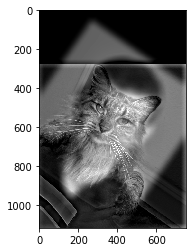

In [50]:
# Hybrid Images Starter Code

import matplotlib
%matplotlib inline
matplotlib.use('TkAgg')

# First load images

# high sf
im1 = plt.imread('./DerekPicture.jpg')/255.
im1_gray = read_image_grey("DerekPicture.jpg")

# low sf
im2 = plt.imread('./nutmeg.jpg')/255
im2_gray = read_image_grey("nutmeg.jpg")


# Next align images (this code is provided, but may be improved)
im1_aligned, im2_aligned = align_images(im1, im2)

im1_aligned_gray = rgb2gray(im1_aligned)
im2_aligned_gray = rgb2gray(im2_aligned)

# You will provide the code below. Sigma1 and sigma2 are arbitrary 
# cutoff values for the high and low frequencies

sigma1 = 49
sigma2 = 49

print(im1_aligned_gray.shape, im2_aligned_gray.shape)

hybrid, low_image, high_image = hybrid_image(im1_aligned_gray, im2_aligned_gray, sigma1, sigma2)

plt.imshow(hybrid, cmap='gray')
plt.show()

Please select 2 points in each image for alignment.


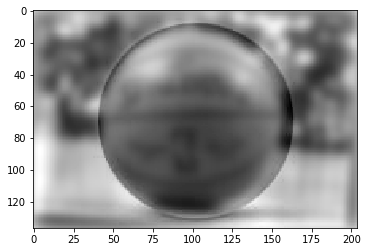

In [51]:
im1 = plt.imread('basketball.jpg')/255.
im2 = plt.imread('pingpongball.jpg')/255

im1_aligned, im2_aligned = align_images(im1, im2)

im1_aligned_gray = rgb2gray(im1_aligned)
im2_aligned_gray = rgb2gray(im2_aligned)

sigma1 = 3
sigma2 = 7

hybrid_fail, low_image_fail, high_image_fail = hybrid_image(im1_aligned_gray, im2_aligned_gray, sigma1, sigma2)

plt.imshow(hybrid_fail, cmap='gray')
plt.show()

The above image is my attempt to make a hybrid image with a ping pong ball and a basketball. I wanted to used the ping pong ball as the higher frequency image, but this image failed because the ping pong ball doesn't have any high frequencies other than it's edges. Therefore the result just looks like a circle with a very blurry basketball inside it.

Please select 2 points in each image for alignment.


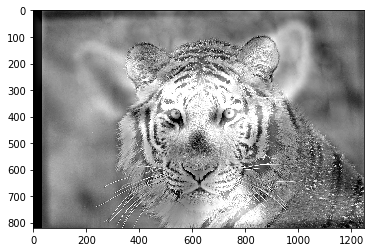

In [52]:
im1 = plt.imread('fox.jpg')/255.
im2 = plt.imread('tiger.jpg')/255

im1_aligned, im2_aligned = align_images(im1, im2)

im1_aligned_gray = rgb2gray(im1_aligned)
im2_aligned_gray = rgb2gray(im2_aligned)

sigma1 = 17
sigma2 = 12

hybrid1, low_image, high_image = hybrid_image(im1_aligned_gray, im2_aligned_gray, sigma1, sigma2)

plt.imshow(hybrid1, cmap='gray')
plt.show()

Please select 2 points in each image for alignment.


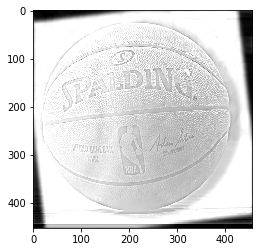

In [53]:
im1 = plt.imread('tennisball.jpg')/255.
im2 = plt.imread('basketball.jpg')/255

im1_aligned, im2_aligned = align_images(im1, im2)

im1_aligned_gray = rgb2gray(im1_aligned)
im2_aligned_gray = rgb2gray(im2_aligned)

sigma1 = 4
sigma2 = 3

hybrid2, low_image, high_image = hybrid_image(im1_aligned_gray, im2_aligned_gray, sigma1, sigma2)

plt.imshow(hybrid2, cmap='gray')
plt.show()

Please select 2 points in each image for alignment.


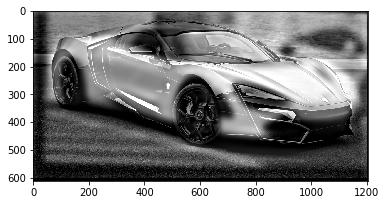

In [54]:
im1 = plt.imread('720s.jpg')/255.
im2 = plt.imread('lykan.jpg')/255

im1_aligned, im2_aligned = align_images(im1, im2)

im1_aligned_gray = rgb2gray(im1_aligned)
im2_aligned_gray = rgb2gray(im2_aligned)

sigma1 = 11
sigma2 = 18

hybrid3, low_image, high_image = hybrid_image(im1_aligned_gray, im2_aligned_gray, sigma1, sigma2)

plt.imshow(hybrid3, cmap='gray')
plt.show()

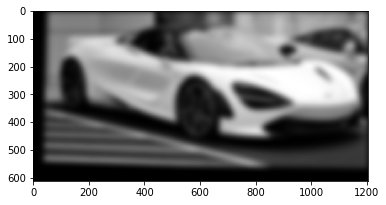

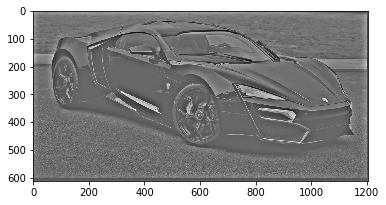

In [55]:
plt.figure()
plt.imshow(low_image, cmap='gray')
plt.show()

plt.figure()
plt.imshow(high_image, cmap='gray')
plt.show()

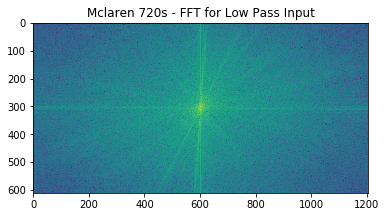

In [56]:
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im1_aligned_gray)))))
plt.title("Mclaren 720s - FFT for Low Pass Input")
plt.show()

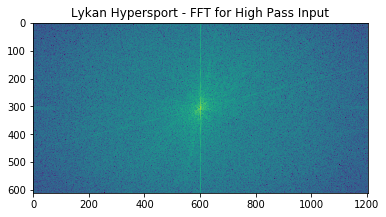

In [57]:
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im2_aligned_gray)))))
plt.title("Lykan Hypersport - FFT for High Pass Input")
plt.show()

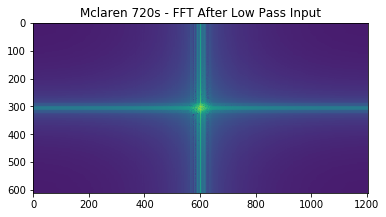

In [58]:
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(low_image)))))
plt.title("Mclaren 720s - FFT After Low Pass Input")
plt.show()

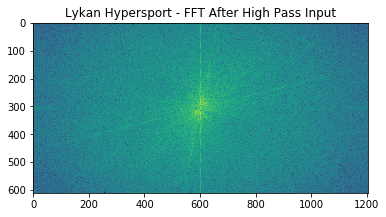

In [59]:
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(high_image)))))
plt.title("Lykan Hypersport - FFT After High Pass Input")
plt.show()

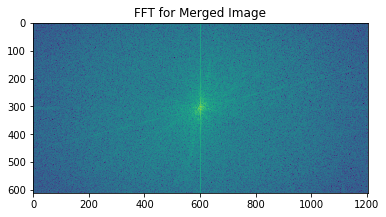

In [60]:
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(hybrid3)))))
plt.title("FFT for Merged Image")
plt.show()

In [61]:
# Save images

fname = 'output_images/hybrid_fail.jpg'
skio.imsave(fname, hybrid_fail)

fname = 'output_images/tiger_fox.jpg'
skio.imsave(fname, hybrid1)

fname = 'output_images/basketball_tennisball.jpg'
skio.imsave(fname, hybrid2)

fname = 'output_images/lykan_720s.jpg'
skio.imsave(fname, hybrid3)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


## Part 2.3: Gaussian and Laplacian Stacks

In [62]:
def guassian_laplacian_stack(im, n):
    guassian_stack = []
    laplacian_stack = []
    
    last_guas = im
    last_lap = im
    curr_guas = None
    curr_lap = None
    
    for i in range(0, n):    
        guas_1d = cv2.getGaussianKernel(12, 4 * i)
        guas_2d = np.outer(guas_1d, guas_1d.T)
        
        curr_guas = signal.convolve2d(last_guas, guas_2d, mode = 'same')
        curr_lap = np.clip((last_guas - curr_guas) + .5, 0, 1)
#         curr_lap = curr_lap + .5

        guassian_stack.append(curr_guas)
        laplacian_stack.append(curr_lap)
    
        last_guas = curr_guas
        last_lap = curr_lap

    return guassian_stack, laplacian_stack    
    

In [63]:
im = read_image_grey("lincoln.jpg")
guas_stack, lap_stack = guassian_laplacian_stack(im, 5)

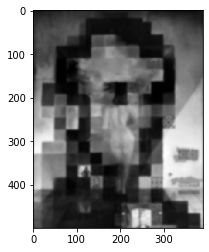

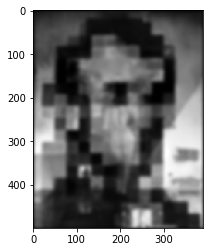

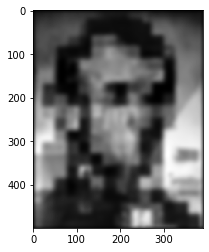

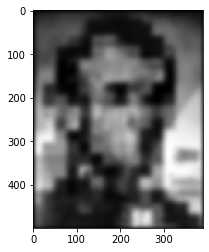

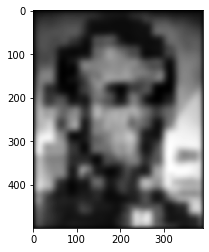

In [64]:
for x in guas_stack:
    plt.figure()
    plt.imshow(x, cmap='gray')
    plt.show()

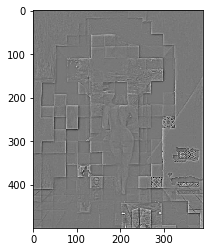

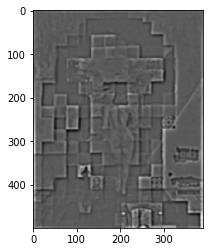

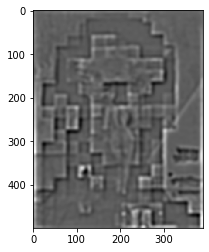

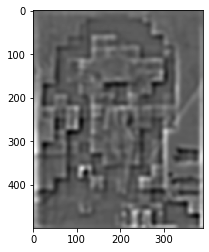

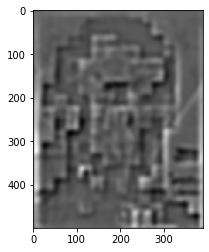

In [65]:
for x in lap_stack:
    plt.figure()
    plt.imshow(x, cmap='gray')
    plt.show()

In [67]:
# Save Images

for i in range(0, len(guas_stack)):
    fname = 'output_images/lincoln_guas_' + str(i) + '.jpg'
    skio.imsave(fname, guas_stack[i])
    fname = 'output_images/lincoln_lap_' + str(i) + '.jpg'
    skio.imsave(fname, lap_stack[i])

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Arav Shah\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: output_images/lincoln_lap_3.jpg is a low contrast image
  import sys
Lossy convers

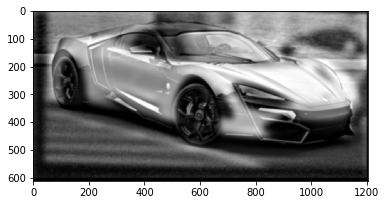

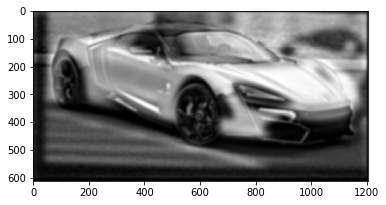

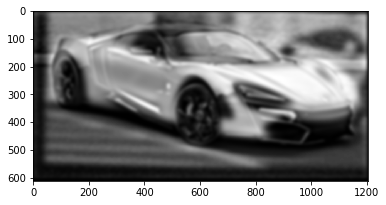

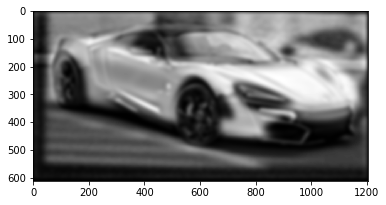

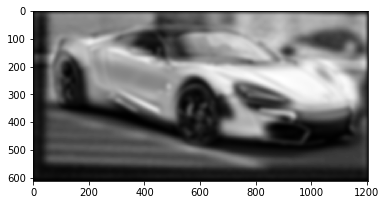

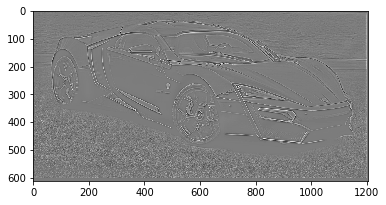

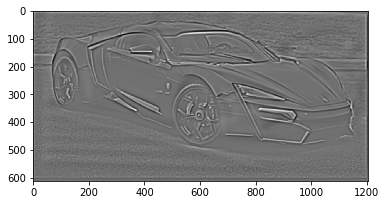

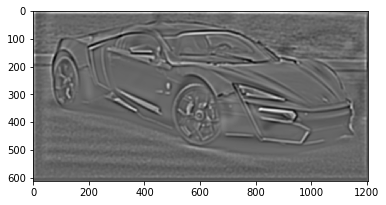

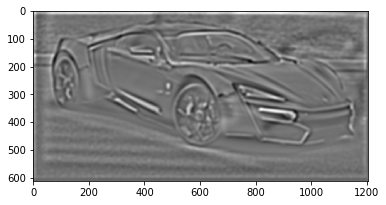

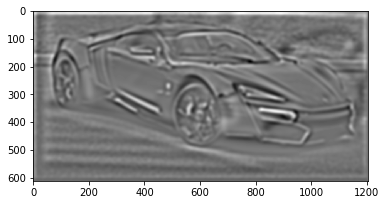

In [68]:
guas_stack, lap_stack = guassian_laplacian_stack(hybrid3, 5)

for x in guas_stack:
    plt.figure()
    plt.imshow(x, cmap='gray')
    plt.show()
    
for x in lap_stack:
    plt.figure()
    plt.imshow(x, cmap='gray')
    plt.show()

In [69]:
# Save Images

for i in range(0, len(guas_stack)):
    fname = 'output_images/cars_guas_' + str(i) + '.jpg'
    skio.imsave(fname, guas_stack[i])
    fname = 'output_images/cars_lap_' + str(i) + '.jpg'
    skio.imsave(fname, lap_stack[i])

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Arav Shah\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: output_images/cars_lap_3.jpg is a low contrast image
  import sys
Lossy conversion

## Part 2.4: Multiresolution Blending 

In [70]:
def guassian_laplacian_stack1(im, n, k):
    guassian_stack = []
    laplacian_stack = []
    
    last_guas = im
    last_lap = im
    curr_guas = None
    curr_lap = None
    
    for i in range(0, n + 1):    
        guas_1d = cv2.getGaussianKernel(k, 3 * i)
        guas_2d = np.outer(guas_1d, guas_1d.T)
        
        curr_guas = signal.convolve2d(last_guas, guas_2d, mode = 'same')
        curr_lap = np.clip((last_guas - curr_guas) + .5, 0, 1)

        if i == n:
            guassian_stack.append(curr_guas)
            laplacian_stack.append(curr_guas)
            break

        guassian_stack.append(curr_guas)
        laplacian_stack.append(curr_lap)
    
        last_guas = curr_guas
        last_lap = curr_lap

    return guassian_stack, laplacian_stack  

In [71]:
from scipy import ndimage, misc

im1 = read_image_grey("apple.jpeg")
im2 = read_image_grey("orange.jpeg")
mask1 = read_image_grey("mask1.jpg")

mask1 = mask1[174:-174, 426:-426]
mask1 = (mask1 * -1) + 1

print(im1.shape, im2.shape, mask1.shape)

(300, 300) (300, 300) (300, 300)


In [72]:
guas_stack_im1, lap_stack_im1 = guassian_laplacian_stack1(im1, 5, 21)
guas_stack_im2, lap_stack_im2 = guassian_laplacian_stack1(im2, 5, 21)
guas_stack_mask1, lap_stack_mask1 = guassian_laplacian_stack1(mask1, 5, 21)

combined_stack = []

for i in range(len(guas_stack_mask1)):
    temp1 = (guas_stack_mask1[i] * lap_stack_im1[i]) 
    temp2 = ((guas_stack_mask1[i]* -1) + 1) * lap_stack_im2[i]
    temp = temp1 + temp2

    combined_stack.append(temp)

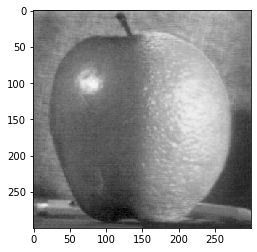

In [73]:
final_im = combined_stack[0] 

for i in range(1, len(combined_stack)):
    final_im += combined_stack[i]

plt.figure()
plt.imshow(final_im, cmap='gray')
plt.show()

In [74]:
# Save Image

fname = 'output_images/orple' + '.jpg'
skio.imsave(fname, final_im)

Lossy conversion from float64 to uint8. Range [2.5816291519107293, 3.4317142989977767]. Convert image to uint8 prior to saving to suppress this warning.


In [75]:
# Image 2

im1 = read_image_grey("new_york_night.jpg")
im2 = read_image_grey("new_york_day.jpg")
mask1 = read_image_grey("mask1.jpg")

im1 = im1[12:-13, 63:-63]
im2 = im2[14:-14, 62:-62]
mask1 = (mask1 * -1) + 1

print(im1.shape, im2.shape, mask1.shape)

(648, 1152) (648, 1152) (648, 1152)


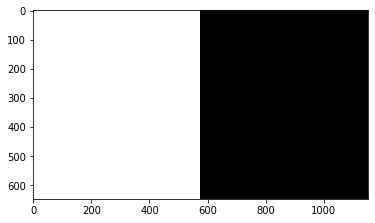

In [76]:
plt.figure()
plt.imshow(mask1, cmap='gray')
plt.show()

In [77]:
guas_stack_im1, lap_stack_im1 = guassian_laplacian_stack1(im1, 5, 21)
guas_stack_im2, lap_stack_im2 = guassian_laplacian_stack1(im2, 5, 21)
guas_stack_mask1, lap_stack_mask1 = guassian_laplacian_stack1(mask1, 5, 49)

combined_stack = []

for i in range(len(guas_stack_mask1)):
    temp1 = (guas_stack_mask1[i] * lap_stack_im1[i]) 
    temp2 = ((guas_stack_mask1[i]* -1) + 1) * lap_stack_im2[i]
    temp = temp1 + temp2

    combined_stack.append(temp)

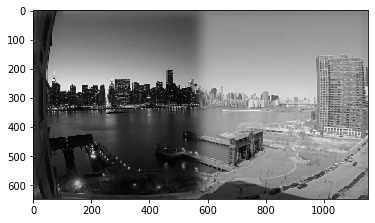

In [78]:
final_im = combined_stack[0] 

for i in range(1, len(combined_stack)):
    final_im += combined_stack[i]

plt.figure()
plt.imshow(final_im, cmap='gray')
plt.show()

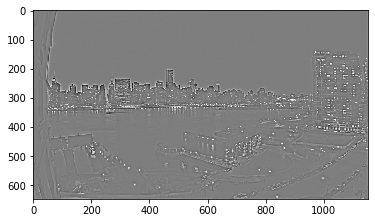

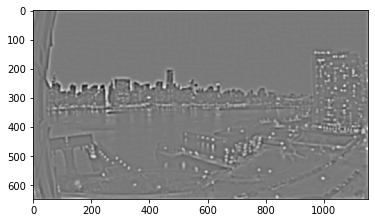

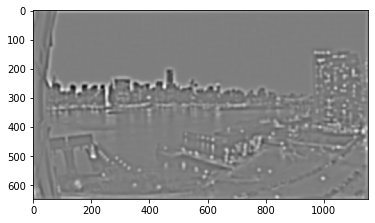

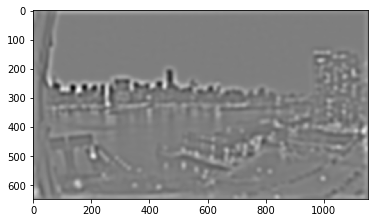

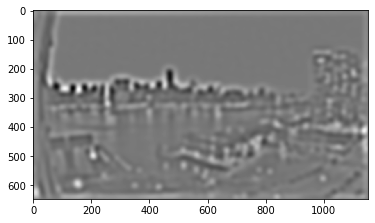

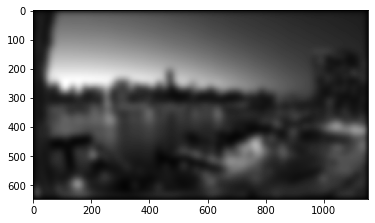

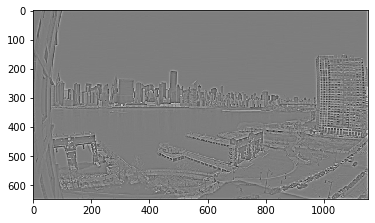

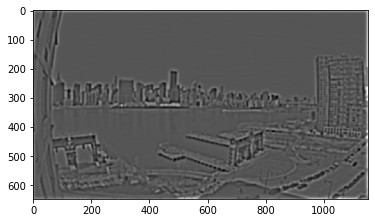

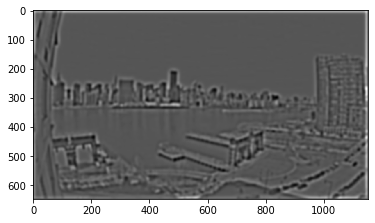

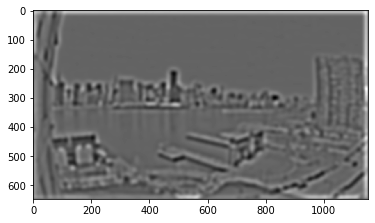

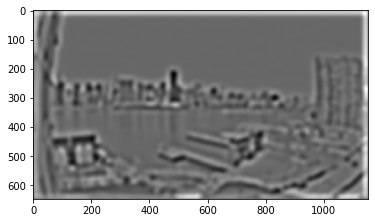

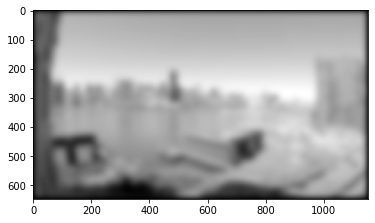

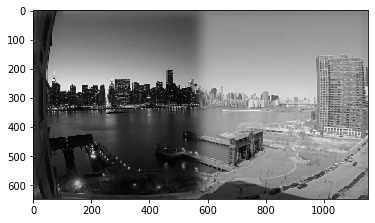

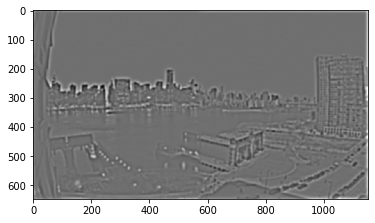

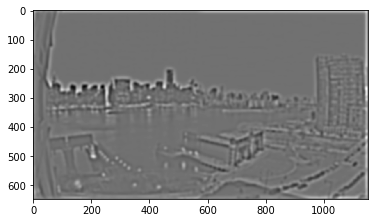

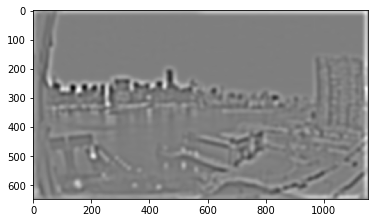

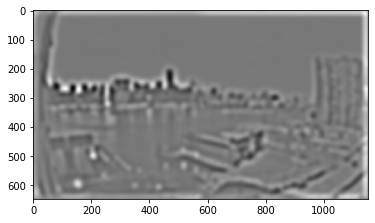

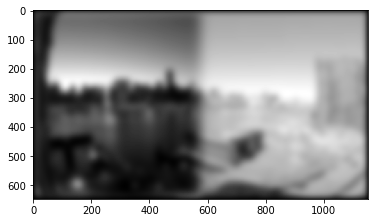

In [79]:
for x in lap_stack_im1:
    plt.figure()
    plt.imshow(x, cmap='gray')
    plt.show()
    
for x in lap_stack_im2:
    plt.figure()
    plt.imshow(x, cmap='gray')
    plt.show()

for x in combined_stack:
    plt.figure()
    plt.imshow(x, cmap='gray')
    plt.show()

In [80]:
# Save Images

fname = 'output_images/ny_final' + '.jpg'
skio.imsave(fname, final_im)

for i in range(0, len(lap_stack_im1)):
    fname = 'output_images/ny_night_lap_' + str(i) + '.jpg'
    skio.imsave(fname, lap_stack_im1[i])
    fname = 'output_images/ny_day_lap_' + str(i) + '.jpg'
    skio.imsave(fname, lap_stack_im2[i])
    fname = 'output_images/ny_combined_' + str(i) + '.jpg'
    skio.imsave(fname, combined_stack[i])

Lossy conversion from float64 to uint8. Range [2.4923418635243744, 3.532459056838402]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2.4923418635243744, 3.532459056838402]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Arav Shah\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: output_images/ny_night_lap_1.jpg is a low contrast image
  
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\Arav Shah\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: output_images/ny_day_lap_1.jpg is a low contrast image
  # Remove the CWD from sys.path while we load stuff.

In [81]:
# Image 3 - Irregular Mask

im1 = read_image_grey("ufo.jpg")
im2 = read_image_grey("mountains.jpg")
mask2 = read_image_grey("mask2.jpg")
mask2 = rescale(mask2, .3)

im1 = im1[:, 10:-15]
im2 = im2[2:-1, :]
mask2 = mask2[0:-14, 11:-60]

print(im1.shape, im2.shape, mask2.shape)

(180, 275) (180, 275) (180, 275)


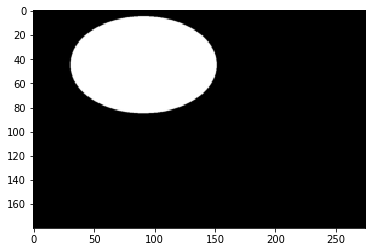

In [82]:
plt.figure()
plt.imshow(mask2, cmap='gray')
plt.show()

In [83]:
guas_stack_im1, lap_stack_im1 = guassian_laplacian_stack1(im1, 5, 13)
guas_stack_im2, lap_stack_im2 = guassian_laplacian_stack1(im2, 5, 13)
guas_stack_mask2, lap_stack_mask2 = guassian_laplacian_stack1(mask2, 5, 21)

combined_stack = []

for i in range(len(guas_stack_mask2)):
    temp1 = (guas_stack_mask2[i] * lap_stack_im1[i]) 
    temp2 = ((guas_stack_mask2[i]* -1) + 1) * lap_stack_im2[i]
    temp = temp1 + temp2
    
    combined_stack.append(temp)

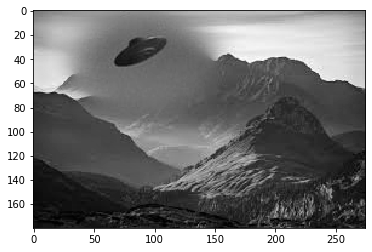

In [84]:
final_im = combined_stack[0] 

for i in range(1, len(combined_stack)):
    final_im += combined_stack[i]

plt.figure()
plt.imshow(final_im, cmap='gray')
plt.show()

In [86]:
# Save Image

fname = 'output_images/ufo_in_mountains' + '.jpg'
skio.imsave(fname, final_im)

fname = 'output_images/mask1' + '.jpg'
skio.imsave(fname, mask1)

fname = 'output_images/mask2' + '.jpg'
skio.imsave(fname, mask2)

Lossy conversion from float64 to uint8. Range [2.490682925968493, 3.491707151330523]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


### Coolest Thing I Learned

The coolest thing I learned in this project was how the unsharp mask filter is able to sharpen an image in only one convolution. Before implementing this, I experimented with sharpenning an image by hand: blurring the image first, then subtracting the blurred image from the original image to get the high frequencies, and finally adding the high frequencies to the original image. It was very cool to see the unsharp mask filter do all this in one operation. 
I also thought the high frequency images looked were very cool and I was surprised that they turned out so good!